In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# Regression with more explanatory variables than just CAPE

df = pd.read_excel('ie_data.xls',sheet_name='Data',skiprows=7)
df.drop(df.tail(1).index,inplace=True)
df.columns = ['','S&P Comp Price','Dividend','Earnings',
              'CPI','','GS10 Interest Rate',
              '','','',
              '','','',
              '', '', '', '', '', '','','','']
df = df[['S&P Comp Price','Dividend','Earnings','CPI','GS10 Interest Rate']]

df['Real Price'] = df['S&P Comp Price'] * 315.67975 / df['CPI']
df['Real Earnings'] = df['Earnings'] * 315.67975 / df['CPI']
df['Real Dividend'] = df['Dividend'] * 315.67975 / df['CPI']

df['Real Earnings MA10'] = df['Real Earnings'].shift(-1).rolling(window=120).mean() 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['CAPE10'] = np.log(df['Real Earnings MA10'])- np.log(df['Real Price'])

df['Real Earnings MA30'] = df['Real Earnings'].shift(-1).rolling(window=360).mean()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['CAPE30'] = np.log(df['Real Earnings MA30'])- np.log(df['Real Price'])

df['Dividend Growth Rate'] = (df['Real Dividend'] / df['Real Dividend'].shift(-1)).shift(1)
df['log D/P'] = np.log(df['Real Dividend'].shift(-1) / df['Real Price'])
df['log P/E'] = np.log(df['Real Price'] / df['Real Earnings'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

/var/folders/yk/l64w5c2s01l4zktkbrqwbf1r0000gn/T/ipykernel_31931/2567069366.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


,S&P Comp Price,Dividend,Earnings,CPI,GS10 Interest Rate,Real Price,Real Earnings,Real Dividend,Real Earnings MA10,CAPE10,Real Earnings MA30,CAPE30,Dividend Growth Rate,log D/P,log P/E
479,9.050000,0.470000,0.730000,9.229089,3.974167,309.554026,24.969551,16.076286,22.609487,-2.616763,16.378415,-2.939168,0.994681,-2.957787,2.517476
480,9.270000,0.470000,0.718300,9.229089,3.980000,317.079096,24.569354,16.076286,22.650320,-2.638977,16.403309,-2.961668,1.000000,-2.950392,2.557651
481,9.430000,0.470000,0.706700,8.943674,3.982500,332.845307,24.943985,16.589321,22.684972,-2.685975,16.426726,-3.008768,0.969074,-3.009503,2.591045
482,9.320000,0.470000,0.695000,9.038840,3.985000,325.499221,24.272742,16.414660,22.719987,-2.662115,16.451988,-2.984914,1.010641,-2.955099,2.596006
483,9.280000,0.470000,0.683300,8.753425,3.987500,334.669932,24.642238,16.949878,22.750955,-2.688538,16.476033,-3.011238,0.968424,-2.982884,2.608683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,4460.063333,69.973507,189.703333,307.051000,4.500000,4585.400074,195.034378,71.939903,153.814803,-3.394883,107.513062,-3.753020,0.993276,-4.149100,3.157457
1835,4685.051500,70.303692,192.430000,306.746000,4.020000,4821.500154,198.034381,72.351235,154.323886,-3.441787,107.926298,-3.799392,0.994315,-4.202273,3.192400
1836,4815.613913,70.477403,192.083333,308.417000,4.060000,4929.014277,196.606603,72.137039,154.821685,-3.460620,108.333995,-3.817675,1.002969,-4.228036,3.221690
1837,5011.961500,70.651114,191.736667,310.326000,4.210000,5098.427954,195.044511,71.869989,155.310927,-3.491258,108.736046,-3.847764,1.003716,-4.265816,3.263460


In [10]:
# Regression with more explanatory variables than just CAPE continued

df['15yr_forward'] = df['Real Price'].shift(-180) / df['Real Price']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

X = df[['CAPE30','CAPE10','Dividend Growth Rate','log D/P','log P/E']].to_numpy()
y = df['15yr_forward'].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.07e-90
Time:                        16:03:43   Log-Likelihood:                -874.29
No. Observations:                 820   AIC:                             1761.
Df Residuals:                     814   BIC:                             1789.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4436      1.893      6.575      0.000       8.729      16.159
x1             0.2194      0.185      1.184      0.237      -0.144       0.583
x2             0.4473      0.187      2.397      0.017       0.081       0.814
x3            -5.6752      1.825     -3.110      0.002      -9.257      -2.093
x4             0.4589      0.181      2.529      0.012       0.103       0.815
x5            -0.8208      0.115     -7.129      0.000      -1.047      -0.595
==============================================================================
Omnibus:                       15.094   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.454
Skew:                           0.316   Prob(JB):                     0.000441
Kurtosis:                       3.228   Cond. No.                         603.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The values changed slightly from the slides, but with the same conclusion that x2 = CAPE10 is statistically significant in predicting 10 year returns, whereas x1 = CAPE30 is not(p-values of 0.237 vs 0.017 with an alpha threshold of 0.05). An adjusted $R^2$ of 0.410 is to be noted as well. I believe Shiller's original result was around ~50.

In [6]:
# Regression with more explanatory variables than just CAPE continued

X1 = df[['CAPE10','Dividend Growth Rate','log D/P','log P/E']]
y1 = df['CAPE30']
X1 = sm.add_constant(X1)
VIF_cape30 = 1 / (1 - sm.OLS(y1,X1).fit().rsquared)
print(f"VIF_cape30: {VIF_cape30}")

X2 = df[['CAPE30','Dividend Growth Rate','log D/P','log P/E']]
y2 = df['CAPE10']
X2 = sm.add_constant(X2)
VIF_cape10 = 1 / (1 - sm.OLS(y2,X2).fit().rsquared)
print(f"VIF_cape10: {VIF_cape10}")

X3 = df[['CAPE10','CAPE30','log D/P','log P/E']]
y3 = df['Dividend Growth Rate']
X3 = sm.add_constant(X3)
VIF_dgr = 1 / (1 - sm.OLS(y3,X3).fit().rsquared)
print(f"VIF_dgr: {VIF_dgr}")

X4 = df[['CAPE10','Dividend Growth Rate','CAPE30','log P/E']]
y4 = df['log D/P']
X4 = sm.add_constant(X4)
VIF_logdp = 1 / (1 - sm.OLS(y4,X4).fit().rsquared)
print(f"VIF_logdp: {VIF_logdp}")

X5 = df[['CAPE10','Dividend Growth Rate','log D/P','CAPE30']]
y5 = df['log P/E']
X5 = sm.add_constant(X5)
VIF_logpe = 1 / (1 - sm.OLS(y5,X5).fit().rsquared)
print(f"VIF_logpe: {VIF_logpe}")

VIF_cape30: 12.068478609246235
VIF_cape10: 11.80223310645909
VIF_dgr: 1.109315118856341
VIF_logdp: 5.6791524677633385
VIF_logpe: 2.9279752537078685


I don't yet have the framework to fully analyze regressions, but to my understanding since this model is to examine a relationship and not necessary make direct predictions, the multicollinearity is not a huge concern. I could be quite wrong. I was not able to understand how Shiller dealt with this issue.

In [104]:
# Regression with just CAPE as an explanatory variable

df1 = pd.read_excel('ie_data.xls',sheet_name='Data',skiprows=7)
df1.drop(df1.tail(1).index,inplace=True)
df1.columns = ['','S&P Comp Price','Dividend','Earnings',
              'CPI','','GS10 Interest Rate',
              '','','',
              '','','',
              '', '', '', '', '', '','','','']
df1 = df1[['S&P Comp Price','Dividend','Earnings','CPI','GS10 Interest Rate']]

df1['Real Price'] = df1['S&P Comp Price'] * 315.67975 / df1['CPI']
df1['Real Earnings'] = df1['Earnings'] * 315.67975 / df1['CPI']
df1['Real Dividend'] = df1['Dividend'] * 315.67975 / df1['CPI']

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df1['Real Earnings MA10'] = df['Real Earnings'].shift(-1).rolling(window=120).mean() 
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)
df1['CAPE10'] = df1['Real Price'] / df1['Real Earnings MA10']

df1['15yr_forward'] = df1['Real Price'].shift(-180) / df1['Real Price']
df1['10yr_forward'] = df1['Real Price'].shift(-120) / df1['Real Price']
df1['7yr_forward'] = df1['Real Price'].shift(-84) / df1['Real Price']
df1['25yr_forward'] = df1['Real Price'].shift(-300) / df1['Real Price']
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

/var/folders/yk/l64w5c2s01l4zktkbrqwbf1r0000gn/T/ipykernel_31931/2312925291.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace([np.inf, -np.inf], np.nan, inplace=True)


In [105]:
# Regression with just CAPE as an explanatory variable

X = df1[['CAPE10']]
X = sm.add_constant(X)
y = df1['15yr_forward']
model = sm.OLS(y, X).fit()
print(model.summary())

X = df1[['CAPE10']]
X = sm.add_constant(X)
y = df1['10yr_forward']
model = sm.OLS(y, X).fit()
print(model.summary())

X = df1[['CAPE10']]
X = sm.add_constant(X)
y = df1['7yr_forward']
model = sm.OLS(y, X).fit()
print(model.summary())

X = df1[['CAPE10']]
X = sm.add_constant(X)
y = df1['25yr_forward']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           15yr_forward   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.77e-31
Time:                        20:50:45   Log-Likelihood:                 57.387
No. Observations:                 119   AIC:                            -110.8
Df Residuals:                     117   BIC:                            -105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1475      0.118     26.713      0.0

Fifteen year forward predictions seemed to give the largest $R^2 = 0.689$.

<Figure size 1000x400 with 0 Axes>

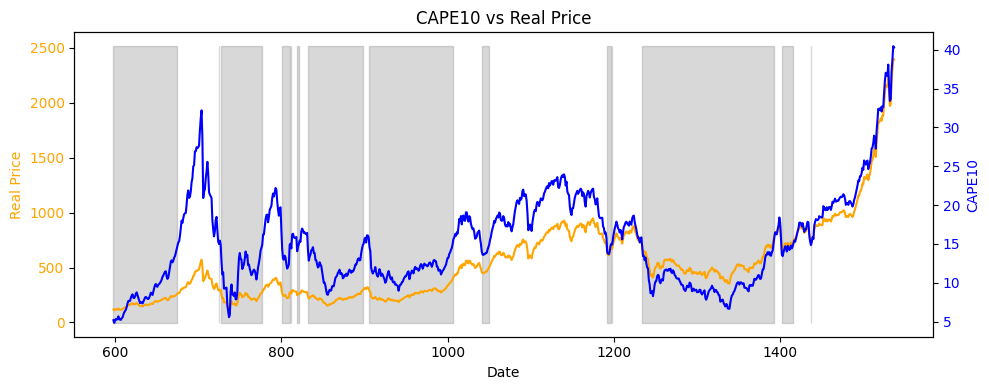

In [87]:
plt.figure(figsize=(10, 4))

# Plot Real Price on the primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(df1.index, df1['Real Price'], label='Real Price', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real Price', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# AI-generated code for adding the special graph features

# Create a second y-axis for CAPE10
ax2 = ax1.twinx()
ax2.plot(df1.index, df1['CAPE10'], label='CAPE10', color='blue')
ax2.set_ylabel('CAPE10', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Shade regions where CAPE10 >= 15.21
ax1.fill_between(
    df1.index, 
    ax1.get_ylim()[0],  # Start from the bottom of the y-axis
    ax1.get_ylim()[1],  # Extend to the top of the y-axis
    where=(df1['CAPE10'] <= 15.00), 
    color='gray', 
    alpha=0.3,
    label='CAPE <= 15.00'
)

plt.title('CAPE10 vs Real Price')
fig.tight_layout()
plt.show()

The shaded areas represent 10 year periods after low ($\leq 15$) CAPE ratios. Generally, there is great increase across these shaded areas.

In [88]:
df1['20yr_forward_window'] = df1['Real Price'].rolling(window = 240).mean().shift(179)
df1.dropna(inplace = True)

condition = df1['CAPE10'] <= 15
subset_smaller = df1[condition].reset_index(drop=True)
subset_larger = df1[~condition].reset_index(drop=True)

print('Larger CAPE mean: ', np.mean(subset_larger['20yr_forward_window']))
print('Smaller CAPE mean: ', np.mean(subset_smaller['20yr_forward_window']))
print ('--------------------------------------')
print('Larger CAPE median: ', np.median(subset_larger['20yr_forward_window']))
print('Smaller CAPE median: ', np.median(subset_smaller['20yr_forward_window']))
print ('--------------------------------------')
print('Larger CAPE std: ', np.std(subset_larger['20yr_forward_window']))
print('Smaller CAPE std: ', np.std(subset_smaller['20yr_forward_window']))

Larger CAPE mean:  428.8270746216655
Smaller CAPE mean:  462.61511898344463
--------------------------------------
Larger CAPE median:  274.1379168384396
Smaller CAPE median:  454.324563989553
--------------------------------------
Larger CAPE std:  207.6130167471679
Smaller CAPE std:  129.74679819939846


Smaller CAPE mean and median returns are higher than those of larger CAPE ones.

In [77]:
# Sum of parts valuation

df = pd.read_excel('ie_data.xls',sheet_name='Data',skiprows=7)
df.drop(df.tail(1).index,inplace=True)
df.columns = ['','S&P Comp Price','Dividend','Earnings',
              'CPI','','GS10 Interest Rate',
              '','','',
              '','','',
              '', '', '', '', '', '','','10 Year Annualized Bonds Real Return','']

df = df[['S&P Comp Price','Dividend','Earnings','CPI','GS10 Interest Rate',
         '10 Year Annualized Bonds Real Return']]

df['Real Price'] = df['S&P Comp Price'] * 315.67975 / df['CPI']
df['Real Earnings'] = df['Earnings'] * 315.67975 / df['CPI']
df['Real Dividend'] = df['Dividend'] * 315.67975 / df['CPI']

df['Real Earnings MA10'] = df['Real Earnings'].shift(1).rolling(window=120).mean() 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['CAPE10'] = df['Real Price'] / df['Real Earnings MA10']

df['D/P'] = df['Real Dividend'] / df['Real Price']

/var/folders/yk/l64w5c2s01l4zktkbrqwbf1r0000gn/T/ipykernel_31931/2979626636.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [95]:
# Sum of parts valuation (cont'd)

df['1/CAPE10'] = 1 / df['CAPE10']

df['Yield_10_later'] = df['10 Year Annualized Bonds Real Return'].shift(-120)
df['delta_Yield'] = 100 * (df['Yield_10_later'] - df['10 Year Annualized Bonds Real Return']) / df['10 Year Annualized Bonds Real Return']

df['Earnings_10_later'] = df['Real Earnings'].shift(-120)
df['delta_Earnings'] = 100 * (df['Earnings_10_later'] - df['Real Earnings'])/ df['Real Earnings']

df['D/P'] = df['Real Dividend'] / df['Real Price']
df['D/P_10_later'] = df['D/P'].shift(-120)
df['delta_D/P'] = 100 * (df['D/P_10_later'] - df['D/P']) / df['D/P']
df.dropna()

,S&P Comp Price,Dividend,Earnings,CPI,GS10 Interest Rate,10 Year Annualized Bonds Real Return,Real Price,Real Earnings,Real Dividend,Real Earnings MA10,...,1/CAPE10_lag7,1/CAPE10_lag8,1/CAPE10_lag9,1/CAPE10_lag10,1/CAPE10_lag11,1/CAPE10_lag12,Predicted_1/CAPE10,CAPE10_after_forecast,CAPE10_after_forecast_shifted,deltaP/E_after
128,6.25,0.3050,0.4525,10.180580,3.646667,0.066945,193.800197,14.031134,9.457450,11.587569,...,0.067038,0.068648,0.069796,0.065614,0.064410,0.062185,0.062131,16.094992,16.824157,4.530384
129,6.15,0.3100,0.4483,10.275745,3.640000,0.067890,188.933297,13.772162,9.523467,11.618092,...,0.068648,0.069796,0.065614,0.064410,0.062185,0.063470,0.061022,16.387639,16.094992,-1.785778
130,6.19,0.3150,0.4442,10.180580,3.633333,0.068193,191.939715,13.773768,9.767530,11.647787,...,0.069796,0.065614,0.064410,0.062185,0.063470,0.065821,0.062852,15.910271,16.387639,3.000375
131,6.01,0.3200,0.4400,10.180580,3.626667,0.068146,186.358269,13.643534,9.922570,11.677495,...,0.065614,0.064410,0.062185,0.063470,0.065821,0.065011,0.063527,15.741223,15.910271,1.073917
132,5.92,0.3200,0.4392,10.180580,3.620000,0.070841,183.567546,13.618727,9.922570,11.708037,...,0.064410,0.062185,0.063470,0.065821,0.065011,0.065487,0.066385,15.063581,15.741223,4.498544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,15.22,0.7367,1.1640,17.300000,3.335000,0.057100,277.725190,21.239955,13.442848,17.554431,...,0.052997,0.050142,0.047041,0.045803,0.047816,0.047434,0.060645,16.489464,15.353760,-6.887451
679,16.03,0.7433,1.1530,17.200000,3.334167,0.056509,294.206186,21.161555,13.642137,17.446990,...,0.050142,0.047041,0.045803,0.047816,0.047434,0.045951,0.055983,17.862707,16.489464,-7.687766
680,16.94,0.7500,1.1430,17.300000,3.333333,0.056417,309.110692,20.856760,13.685538,17.347521,...,0.047041,0.045803,0.047816,0.047434,0.045951,0.043469,0.057893,17.273361,17.862707,3.411877
681,16.68,0.7567,1.1320,17.400000,3.332500,0.057046,302.617140,20.537326,13.728441,17.255690,...,0.045803,0.047816,0.047434,0.045951,0.043469,0.042412,0.056459,17.712039,17.273361,-2.476717


In [96]:
# Sum of parts valuation, constructing VAR model to predict 1/CAPE10 (I am quite unsure about this part)

df['10yr_forward'] = (df['Real Price'].shift(-120) / df['Real Price']) * 100
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

df['1/CAPE10_lag1'] = df['1/CAPE10'].shift(-1)
df['1/CAPE10_lag2'] = df['1/CAPE10'].shift(-2)
df['1/CAPE10_lag3'] = df['1/CAPE10'].shift(-3)
df['1/CAPE10_lag4'] = df['1/CAPE10'].shift(-4)
df['1/CAPE10_lag5'] = df['1/CAPE10'].shift(-5)
df['1/CAPE10_lag6'] = df['1/CAPE10'].shift(-6)
df['1/CAPE10_lag7'] = df['1/CAPE10'].shift(-7)
df['1/CAPE10_lag8'] = df['1/CAPE10'].shift(-8)
df['1/CAPE10_lag9'] = df['1/CAPE10'].shift(-9)
df['1/CAPE10_lag10'] = df['1/CAPE10'].shift(-10)
df['1/CAPE10_lag11'] = df['1/CAPE10'].shift(-11)
df['1/CAPE10_lag12'] = df['1/CAPE10'].shift(-12)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

X = df[['1/CAPE10_lag1','1/CAPE10_lag2','1/CAPE10_lag3','1/CAPE10_lag4',
       '1/CAPE10_lag5','1/CAPE10_lag6','1/CAPE10_lag7','1/CAPE10_lag8',
       '1/CAPE10_lag9','1/CAPE10_lag10','1/CAPE10_lag11','1/CAPE10_lag12']].to_numpy()
y = df['1/CAPE10'].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

predicted_values = []
for i in range(len(X)):
    prediction = model.predict(X[i])
    predicted_values.append(prediction[0])

df['Predicted_1/CAPE10'] = predicted_values

df.replace([np.inf, -np.inf,0], np.nan, inplace=True)
df.dropna(inplace=True)
df

,S&P Comp Price,Dividend,Earnings,CPI,GS10 Interest Rate,10 Year Annualized Bonds Real Return,Real Price,Real Earnings,Real Dividend,Real Earnings MA10,...,1/CAPE10_lag7,1/CAPE10_lag8,1/CAPE10_lag9,1/CAPE10_lag10,1/CAPE10_lag11,1/CAPE10_lag12,Predicted_1/CAPE10,CAPE10_after_forecast,CAPE10_after_forecast_shifted,deltaP/E_after
128,6.25,0.3050,0.4525,10.180580,3.646667,0.066945,193.800197,14.031134,9.457450,11.587569,...,0.067038,0.068648,0.069796,0.065614,0.064410,0.062185,0.060976,16.094992,16.824157,4.530384
129,6.15,0.3100,0.4483,10.275745,3.640000,0.067890,188.933297,13.772162,9.523467,11.618092,...,0.068648,0.069796,0.065614,0.064410,0.062185,0.063470,0.060422,16.387639,16.094992,-1.785778
130,6.19,0.3150,0.4442,10.180580,3.633333,0.068193,191.939715,13.773768,9.767530,11.647787,...,0.069796,0.065614,0.064410,0.062185,0.063470,0.065821,0.062048,15.910271,16.387639,3.000375
131,6.01,0.3200,0.4400,10.180580,3.626667,0.068146,186.358269,13.643534,9.922570,11.677495,...,0.065614,0.064410,0.062185,0.063470,0.065821,0.065011,0.063749,15.741223,15.910271,1.073917
132,5.92,0.3200,0.4392,10.180580,3.620000,0.070841,183.567546,13.618727,9.922570,11.708037,...,0.064410,0.062185,0.063470,0.065821,0.065011,0.065487,0.066424,15.063581,15.741223,4.498544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,12.62,0.6525,1.2440,17.500000,3.510000,0.064710,227.650197,22.440321,11.770345,19.179112,...,0.073346,0.071259,0.069022,0.066656,0.066136,0.063208,0.080921,12.343376,11.618978,-5.868716
667,13.12,0.6600,1.2430,17.400000,3.481667,0.062988,238.029789,22.551145,11.974059,19.059448,...,0.071259,0.069022,0.066656,0.066136,0.063208,0.059302,0.078991,12.761055,12.343376,-3.273081
668,13.32,0.6675,1.2420,17.500000,3.453333,0.063251,240.277387,22.404243,12.040928,18.930488,...,0.069022,0.066656,0.066136,0.063208,0.059302,0.056121,0.081140,12.333380,12.761055,3.467620
669,13.02,0.6750,1.2420,17.600000,3.425000,0.063512,233.531270,22.276946,12.107036,18.792978,...,0.066656,0.066136,0.063208,0.059302,0.056121,0.057022,0.080809,12.339424,12.333380,-0.048976


In [97]:
# imputing the predicted 1/CAPE10 to calculate delta P/E

df['CAPE10_after_forecast'] = 1 / df['Predicted_1/CAPE10']
df['CAPE10_after_forecast_shifted'] = df['CAPE10_after_forecast'].shift(1)

df.replace([np.inf, -np.inf,0], np.nan, inplace=True)
df.dropna(inplace=True)

df['deltaP/E_after'] = 100 * (df['CAPE10_after_forecast_shifted'] - 
                            df['CAPE10_after_forecast'])/df['CAPE10_after_forecast']

X = df[['deltaP/E_after','delta_Earnings','D/P']].to_numpy()
y = df['10yr_forward'].to_numpy()
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.08e-86
Time:                        16:51:29   Log-Likelihood:                -2768.6
No. Observations:                 539   AIC:                             5545.
Df Residuals:                     535   BIC:                             5562.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5542      8.463     -4.437      0.000     -54.179     -20.929
x1             0.1636      0.400      0.409      0.683      -0.622       0.950
x2             0.7336      0.037     19.764      0.000       0.661       0.807
x3          2856.1665    159.269     17.933      0.000    2543.297    3169.036
==============================================================================
Omnibus:                       72.134   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.503
Skew:                           0.756   Prob(JB):                     5.66e-33
Kurtosis:                       5.080   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""